# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!


import pandas as pd
import numpy as np
import seaborn as sns

# Create a new dataframe from your CSV

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [80]:
# Print out any information you need to understand your dataframe

df.describe()

df.head()

# df.shape


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

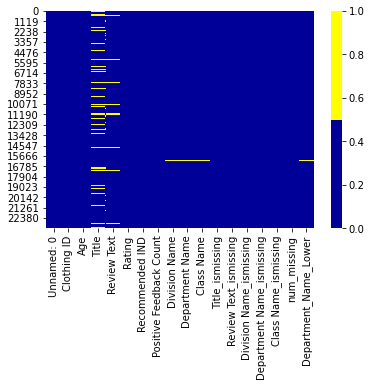

In [95]:
# Plot a heatmap of any missing data

cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [89]:
# Try out a missing data percentage list! 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))


Unnamed: 0 - 0.0%
Clothing ID - 0.0%
Age - 0.0%
Title - 16.22243038405859%
Review Text - 3.5978881035510515%
Rating - 0.0%
Recommended IND - 0.0%
Positive Feedback Count - 0.0%
Division Name - 0.059609980413863575%
Department Name - 0.059609980413863575%
Class Name - 0.059609980413863575%
Title_ismissing - 0.0%
Review Text_ismissing - 0.0%
Division Name_ismissing - 0.0%
Department Name_ismissing - 0.0%
Class Name_ismissing - 0.0%
num_missing - 0.0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

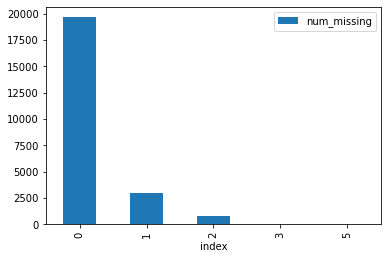

In [82]:
# Plot a missing data histogram

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing >= 1:  
        print('created missing indicator for: {}'.format(col))


df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [96]:
# Handle any missing data in your dataframe.

# It looks like most of the missing data is in the Title category. Presumably this does not add
# much more meaningful information than the review description and rating - it probably makes sense to drop
# the category. 4% of reviews are also missing review text. This text seems to contain meaningful information,
# so I am not sure it makes sense to delete it outright... but it is also quantiative information, so I'm not
# sure if I can use it in analysis? For now I will drop the category because I don't know how to analyze 
# non-numeric data but in the future I would consider other options. There are very few missing division
# name, department name, and class name. These seem like features that you could potentially guess from 
# other column information, I so I would try to impute this data unless.

df_less_title_and_text = df.drop(['Title', 'Review Text'], axis=1)

df_less_title_and_text.head()

# Here, I would show how I cleaned up the columns with missing class, division, department information
# if I was not travelling and short on time this week. :) 

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing,Department_Name_Lower
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1,intimate
1,1,1080,34,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1,dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0,dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0,bottoms
4,4,847,47,5,1,6,General,Tops,Blouses,False,False,False,False,False,0,tops


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

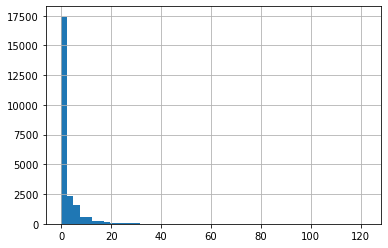

In [97]:
# Plot a histogram to see if there are any outliers.
# df['Age'].hist(bins=50) #No outliers here - some reviwers in their 90s? Seems reasonable, though.
# df['Positive Feedback Count'].hist(bins=50) # Could be an outlier here! 
# Seems like the highest value is around 120, much higher than others. An error?

In [51]:
# Use the describe() method

df_less_title_and_text.describe()


,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,num_missing
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,0.199991
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,0.485762
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,5.000000


<AxesSubplot:>

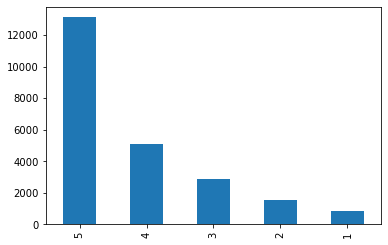

In [99]:
# Plot a bar chart

df['Rating'].value_counts().plot.bar() #Etc for other columns



Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

# .describe() was most helpful in seeing max or min values that were unusual. It was a little hard to see
# the specific values on the histogram, although a visual aid is always helpful. The bar chart was only
# useful for visualizing distribution of categorical columns, and I had already established that there were 
# no outliers in these, although it was useful to see it even if not specifically useful for outliers.

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Look for any irrelevant data in the dataframe. How will you handle it?

In [68]:
# Look for duplicates. How will you handle any duplicates?

df_dedupped = df.drop('Unnamed: 0', axis=1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

# There are 21 duplicate rows. I will remove these duplicates.

(23486, 17)
(23465, 16)


In [85]:
# Think about what data in the dataframe may be uninformative. 
# Make note here of what situations may render data uninformative and how you would handle it?

num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

# Not sure if any of the numerical data is uninformative - there is not a category with a high
# percentage of the same value except for the is_missing columns which I made and don't know how to delete.
# Only thing that could be uninformative is string data which I cannt analyze but suspect in the future could
# pull meaningful information from so will leave in.

Review Text_ismissing: 96.40211%
False    22641
True       845
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94039%
False    23472
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94039%
False    23472
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94039%
False    23472
True        14
Name: Class Name_ismissing, dtype: int64



## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [92]:
# Try to convert all the strings in a column to lower or upper case. 

df['Department_Name_Lower'] = df['Department Name'].str.lower()
df['Department_Name_Lower'].value_counts(dropna=False)

tops        10468
dresses      6319
bottoms      3799
intimate     1735
jackets      1032
trend         119
NaN            14
Name: Department_Name_Lower, dtype: int64